# Radar chart & parallel coordinates plot

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [2]:
sinatra_df = pd.read_csv("data/spotify/frank_sinatra_tracks.csv")
eminem_df = pd.read_csv("data/spotify/eminem_tracks.csv")
mj_df = pd.read_csv("data/spotify/michael_jackson_tracks.csv")
rihanna_df = pd.read_csv("data/spotify/rihanna_tracks.csv")
beatles_df = pd.read_csv("data/spotify/the_beatles_tracks.csv")

In [3]:
audio_features = ['danceability', 'energy', 'loudness', \
                          'acousticness',\
                         'liveness', 'valence', 'tempo']

analysis_sinatra_df = sinatra_df[audio_features]
analysis_eminem_df = eminem_df[audio_features]
analysis_mj_df = mj_df[audio_features]
analysis_rihanna_df = rihanna_df[audio_features]
analysis_beatles_df = beatles_df[audio_features]

In [4]:
def std_data(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    std_df = pd.DataFrame(x_scaled)
    std_df.columns = df.columns
    return std_df

In [5]:
mean_sinatra_df = std_data(analysis_sinatra_df).mean().to_frame().T
mean_eminem_df = std_data(analysis_eminem_df).mean().to_frame().T
mean_mj_df = std_data(analysis_mj_df).mean().to_frame().T
mean_rihanna_df = std_data(analysis_rihanna_df).mean().to_frame().T
mean_beatles_df = std_data(analysis_beatles_df).mean().to_frame().T

In [6]:
def radar_chart(sinatra = False , eminem = False, mj = False, rihanna = False, beatles = False):
    fig = go.Figure()
    if sinatra :
        fig.add_trace(go.Scatterpolar(
              r=mean_sinatra_df.values[0],
              theta=audio_features,
              name='Sinatra'))
    if eminem : 
        fig.add_trace(go.Scatterpolar(
              r=mean_eminem_df.values[0],
              theta=audio_features,
              name='Eminem'))
    if mj :
        fig.add_trace(go.Scatterpolar(
              r=mean_mj_df.values[0],
              theta=audio_features,
              name='MJ'))
    if rihanna :
        fig.add_trace(go.Scatterpolar(
              r=mean_rihanna_df.values[0],
              theta=audio_features,
              name='Rihanna'))
    if beatles :
        fig.add_trace(go.Scatterpolar(
              r=mean_beatles_df.values[0],
              theta=audio_features,
              name='The Beatles'))
    
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1])),
      showlegend=True)
    fig.show()

In [7]:
radar_chart(sinatra = True , eminem = True, mj = True, rihanna = True, beatles = True)

In [8]:
std_sinatra_df = std_data(analysis_sinatra_df)
std_eminem_df = std_data(analysis_eminem_df)
std_mj_df = std_data(analysis_mj_df)
std_rihanna_df = std_data(analysis_rihanna_df)
std_beatles_df = std_data(analysis_beatles_df)

std_sinatra_df['artist'] = "Frank Sinatra"
std_eminem_df['artist'] = "Eminem"
std_mj_df['artist'] = "Michael Jackson"
std_rihanna_df['artist'] = "Rihanna"
std_beatles_df['artist'] = "The Beatles"

all_artist_df = pd.concat([std_sinatra_df , std_eminem_df,std_mj_df, std_rihanna_df, std_beatles_df ])

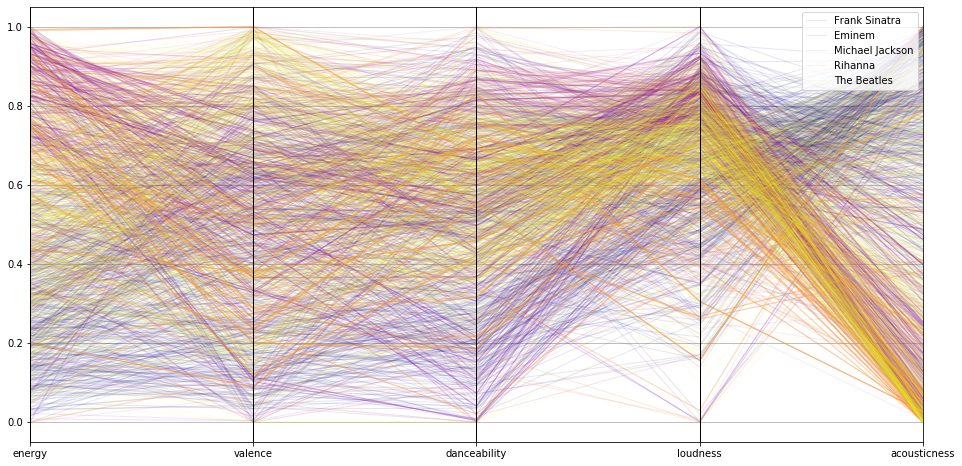

In [9]:
columns = ['energy', 'valence', 'danceability', 'loudness','acousticness']

plt.figure(figsize=(16,8))
cmap = plt.cm.get_cmap('plasma')
colors = [cmap(x) for x in np.linspace(0, 1, 5)]
pd.plotting.parallel_coordinates(all_artist_df , class_column = 'artist' , cols = columns, alpha = 0.1, linewidth = 1, color = colors)
plt.show()

In [195]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = all_artist_df['artist'],
                   colorscale = [[0,'#d8e2dc'],[0.25,'#ffe5d9'],[0.5,'#ffcad4'],[0.75,'#f4acb7'],[1,'#9d8189']]),
        dimensions = list([
            dict(range = [0,1],
                label = 'Danceability', values = all_artist_df['danceability']),
            dict(range = [0,1],
                label = 'Energy', values = all_artist_df['energy']),
            dict(range = [0,1],
                label = 'Loundness', values = all_artist_df['loudness']),
            dict(range = [0,1],
                label = 'acousticness', values = all_artist_df['acousticness'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()